<a href="https://colab.research.google.com/github/jvSett/Car_Plates/blob/main/YoloV5_V_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Загрузка и установка библиотек и зависимостей**

In [ ]:
!pip install easyocr 

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
!git reset --hard 82bec4c8785e123bbea01f6f2d4215c2077ac81f

In [ ]:
!pip install -r /content/yolov5/requirements.txt

In [5]:
import cv2
import torch
import easyocr
import numpy as np
import matplotlib.pyplot as plt

**2. Загрузка предпретренированной модели**

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5m', pretrained=True)

Проверка работы модели

In [ ]:
img = 'https://i.ibb.co/Dr1JQGx/Cars132.png'

result = model(img)
result.print()

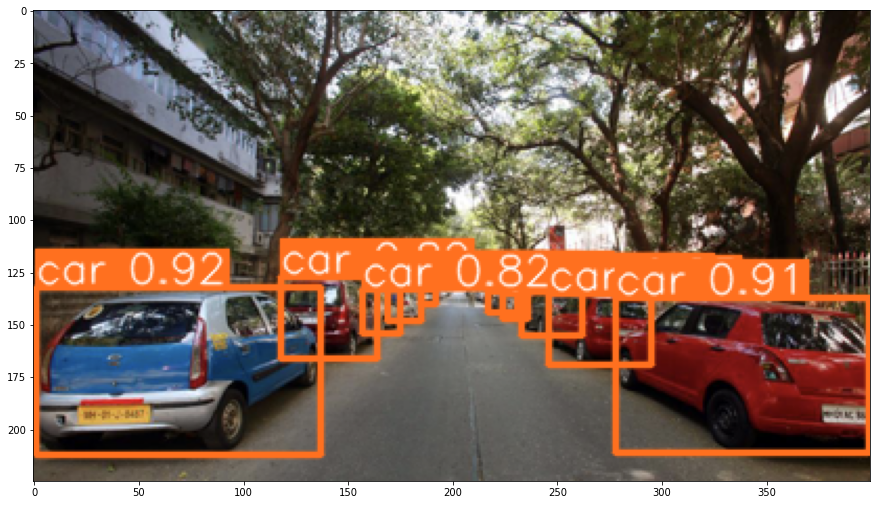

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

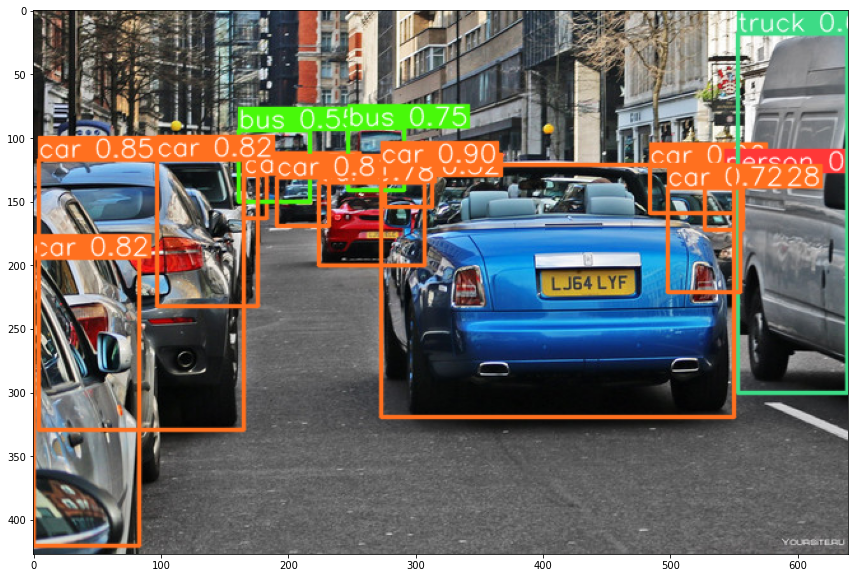

In [9]:
%matplotlib inline

img = 'https://i.ibb.co/dpcgdyw/english-cars.jpg'

fig = plt.figure(figsize=(15, 10))
result = model(img)
plt.imshow(np.squeeze(result.render()))
plt.show()

**3. Загрузка датасета**

In [ ]:
!mkdir /content/yolov5/license_plate_data
%cd /content/yolov5/license_plate_data

In [ ]:
!gdown 1c0hRfi1W27j6P8jFCTGG7AqFVgkUY8xC

In [ ]:
!unzip /content/yolov5/license_plate_data/final_dataset.zip

In [ ]:
# Загрузка конфигурационного файла датасета
!gdown 1RFiHWGfst1Pnb9RoB_LEGdnlyh0hBOiK 

In [ ]:
# Загрузка подправленного конфигурационного файла датасета
!gdown 1-3wOo1v73IWSnNG4yt9gWgclgBlyxB_A 

In [ ]:
%cd /content/yolov5

In [ ]:
# Установка wandb для отображения всех графиков в аккаунт на wandb.ai
!pip install wandb 

**4. Обучение модели**

In [ ]:
!python train.py --img 640 --batch-size 8 --epochs 200 --data /content/yolov5/license_plate_data/dataset.yaml --weights /content/yolov5/yolov5m.pt --cfg /content/yolov5/license_plate_data/yolov5m_edited.yaml --worker 2 --device 0

:**Если тренировали модель, устанавливаем наши веса**

In [ ]:
#!mv /content/yolov5/runs/train/exp2/weights/best.pt /content/

**Загрузка своих весов**

In [ ]:
%cd /content
!gdown 1WMhkrgd01CbzkESRLHXTDDTXpG5j6NdK

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt', force_reload=True)

**5. Работа модели**

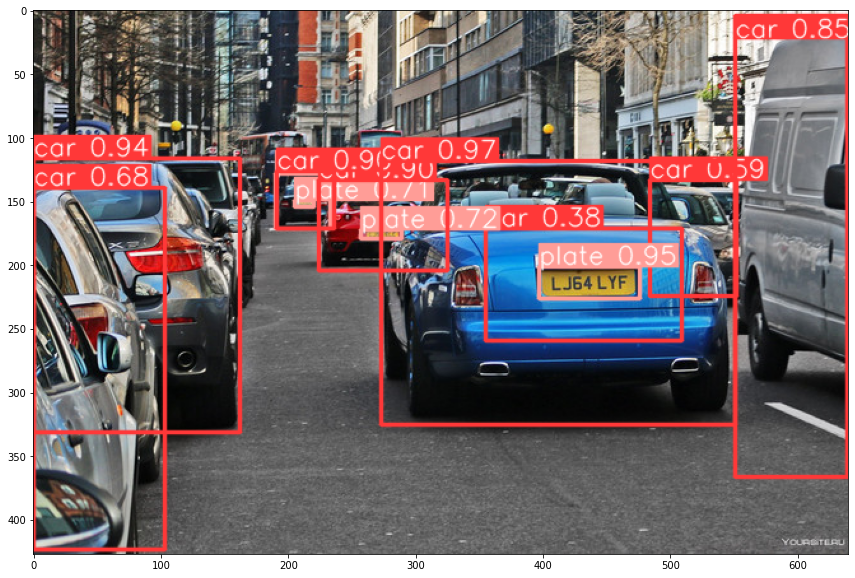

In [19]:
%matplotlib inline

img = 'https://i.ibb.co/dpcgdyw/english-cars.jpg'
result = model(img)

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

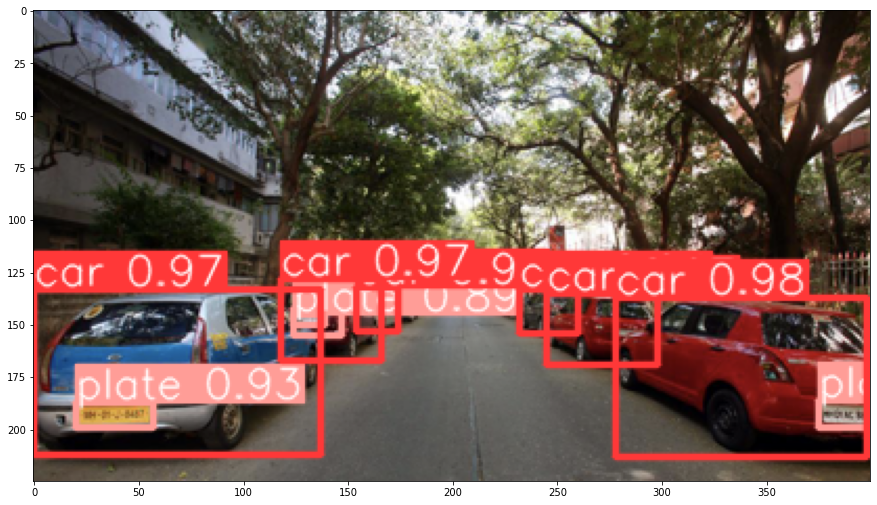

In [20]:
%matplotlib inline

img = 'https://i.ibb.co/Dr1JQGx/Cars132.png'
result = model(img)

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

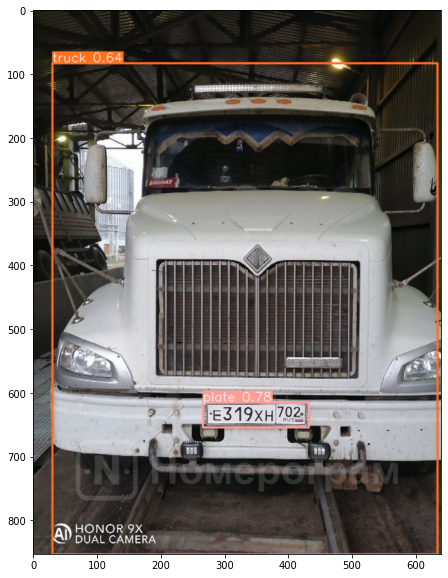

In [21]:
%matplotlib inline 

img = 'https://i.ibb.co/BtnZXqb/check-result1.jpg'
result = model(img)

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

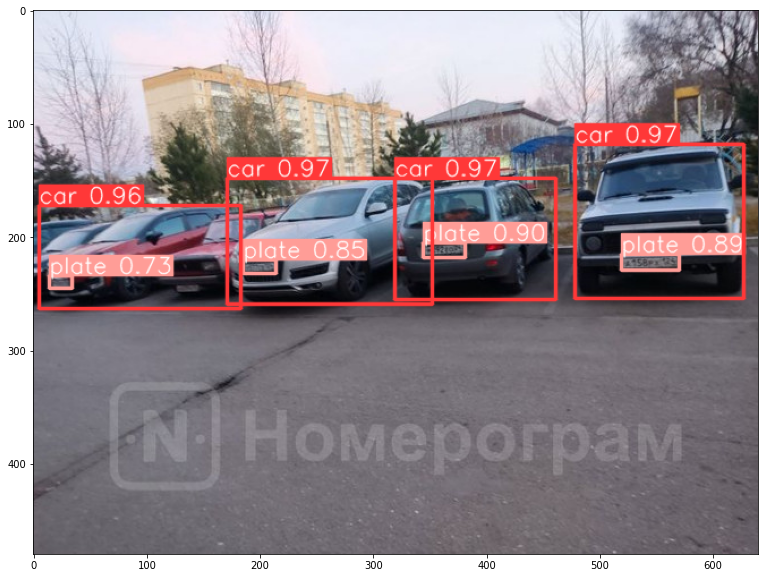

In [22]:
%matplotlib inline

img = 'https://i.ibb.co/g9Jc2J8/check-result.jpg'
result = model(img)

fig = plt.figure(figsize=(15, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

**6. Детектирование изображений с помощью easyocr**

In [ ]:
%cd /content/yolov5

Подгружаем файл для детекции

In [ ]:
!gdown 15YiTtI1w6nPKTO6-ycbK81mwOlOrJLr8

In [ ]:
!python detect_easyocr.py --weights /content/best.pt --source /content/test.jpg --device 0

**7. Результат детектирования**

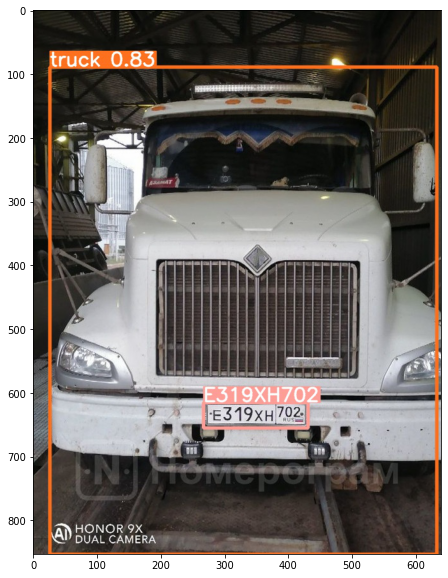

In [31]:
%matplotlib inline

fig = plt.figure(figsize=(15, 10))
img = plt.imread('/content/yolov5/runs/detect/exp2/check-result1.jpg')

plt.imshow(img)
plt.show()

In [32]:
!mv /content/yolov5/runs/detect/exp2/check-result1.jpg /content/drive/MyDrive/

**8. Метрики**

In [ ]:
%cd /content/yolov5/license_plate_data/

# Подгружаем конфиг-файл для тестового датасета
!gdown 1dYXBqTNCoTNI-3eiBEdJsOJ0bESt4IiB

In [34]:
%cd /content/yolov5/

/content/yolov5


In [ ]:
!python val.py --weights /content/best.pt --data /content/yolov5/license_plate_data/test.yaml --img 640

In [ ]:
!python detect.py --weights /content/best.pt --source /content/test.jpg --device 0